## Classification

반응변수가 질적 변수인 경우들이 많이 있다.

질적 변수들의 예:

\begin{align*}
&\textrm{eye color} \in \{ \textrm{brown}, \textrm{blue}, \textrm{green} \}  \\
&\textrm{email} \in \{\textrm{spam}, \textrm{ham} \} 
\end{align*}

질적 반응변수를 예측하는 분류 (classfication)에 대해 알아보자. 크게 두 가지 방법이 있다.

* 주어진 입력 변수 $X$에 대해 클래스를 결정하는 함수 $C(X)$를 찾는 방법  
* 입력 변수 $X$가 어떤 클래스에 속하는 확률을 구하는 방법

질적 반응 변수가 두 개의 클래스로 이루어진 경우 선형회귀 방법 또한 잘 작동한다. 하나의 클래스를 0으로 다른 하나를 1로 설정한다.

이는 나중에 살펴볼 linear discriminat analysis와 동치이다.

하지만, 클래스의 숫자가 늘어나면 선형회귀 방법은 적용하기 어렵다. 

예를 들어, 응급실에 환자가 도착한 경우, 증상에 따른 분류를 다음의 숫자들로 치환하여 선형회귀를 진행할 수 있다.

$$
    Y = 
\begin{cases}
    1, & \text{if stroke;} \\
    2, & \text{if drug overdose;} \\
    3, & \text{if epileptic seizure.}
\end{cases}
$$

하지만, 위 코딩은 $Y$에 순서 구조와 거리 구조를 강제하며, 이는 질적 변수의 특징이 아니다.

따라서 분류를 위해 특별히 고안된 방법들을 사용하는 것이 좋겠다.

### Logistic regression

balance라는 입력 변수를 이용하여 default의 여부를 예측하는 문제를 생각해 보자. Default에 대한 반응변수 $Y$는 다음과 같이 코딩한다.

$$
    Y = 
\begin{cases}
    0, & \text{if No;} \\
    1, & \text{if Yes.} 
\end{cases}
$$

주어진 $X$에 대해 default가 발생할 확률을 다음과 같이 표현하자.

$$ p(X) = \mathbb P (Y = 1 | X)$$

Logistic regression에서는 다음의 식을 가정한다.

$$ p(X) = \frac{e^{\theta_0 + \theta_1 X}}{1 + e^{\theta_0 + \theta_1 X}} $$

위와 같이 가정하면 $\theta$나 $X$의 값에 상관없이 $p(X)$는 항상 0과 1 사이의 값을 취한다.

또한, 위 식은 다음으로도 표현되며, $p(X)$의 log odds 혹은 logit transformation이라고도 불리운다.

$$ \log \left( \frac{p(X)}{1 - p(X)}\right)  = \theta_0 + \theta_1 X $$

### Maximum likelihood

관찰값 $\{x_i, y_i \}$가 주어졌을 때, logistic regression의 모수 $\theta_0, \theta_1$을 추정하기 위해, likelihood 함수를 정의하자.

$$ \ell (\theta_0, \theta_1) = \prod_{i:y_i=1} p(x_i) \prod_{i:y_i=0}(1-p(x_i)) $$

여기서 $p(x_i) = \frac{e^{\theta_0 + \theta_1 x_i}}{1 + e^{\theta_0 + \theta_1 x_i}}$ 이므로 위 식의 우변은 $\theta_0, \theta_1$의 함수이다.

추정량 $\hat \theta_0, \hat \theta_1$은 $\ell (\theta_0, \theta_1)$를 최대화하는 값들로 다음으로 표현된다.

$$ \hat \theta_0, \hat \theta_1 = \arg \max_{\theta_0, \theta_1} \ell (\theta_0, \theta_1) $$

$\hat \theta_0, \hat \theta_1$의 추정치가 결정되면 이를 이용하여 주어진 $X$에 대해 default 확률을 추정할 수 있다.

$$ \hat p(X) = \frac{e^{\hat \theta_0 + \hat \theta_1 X}}{1 + e^{\hat \theta_0 + \hat \theta_1 X}} $$

### 여러 입력변수로 확장

로지스틱 회귀는 자연스럽게 여러 입력변수를 가지는 모형으로도 확장 가능하다.

$$ \log \left( \frac{p(X)}{1 - p(X)}\right)  = \theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p  $$

혹은,

$$ p(X) = \frac{e^{\theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p}}{1 + e^{\theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p}} $$


### 로지스틱 회귀의 gradient vector

앞서 공부한 경사하강법은 로지스틱 회귀방법에도 적용 가능하다.

훈련 샘플 하나에 대한 손실 함수를 다음으로 두자.

$$ c(\boldsymbol{\theta}) = \left\{\begin{array}{lr}
        -\log(p), & \text{if } y = 1\\
        -\log(1 - p), & \text{if } y = 0\\
        \end{array}\right.
$$

이를 전체 샘플에 평균으로 적용하여 확장하면, 비용함수는
$$ J(\boldsymbol{\theta}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i)\log(1- p_i) \right]$$
이며, 여기서
$$ \ p_i = \sigma(\boldsymbol{\theta} \cdot x_i) = \frac{1}{1 + \exp( - \boldsymbol{\theta} \cdot x_i)} = \frac{1}{1 + \exp( - \theta_0 - x_{i1} \theta_1 - \cdots -  x_{ip} \theta_p )}. $$

다음에 대해
$$ \sigma(t) = \frac{1}{1 + \exp(-t)} $$
미분은
$$ \frac{d}{d t}\sigma(t) = \sigma(t) (1 - \sigma(t))$$
와 같이 주어지므로, 비용함수의 편미분을 다음과 같이 계산할 수 있다.

\begin{align*}
\frac{\partial }{\partial \theta_j} J(\theta) &= -\frac{1}{N} \sum_{i=1}^{N} 
\left[ y_i  \frac{ \frac{\partial }{\partial \theta_j} \sigma(\theta \cdot x_i)}{\sigma(\theta \cdot x_i)} + (1 - y_i)  \frac{ \frac{\partial }{\partial \theta_j} \left\{ 1 - \sigma(\theta \cdot x_i) \right\} }{1 - \sigma(\theta \cdot x_i)} \right]\\
&= -\frac{1}{N} \sum_{i=1}^{N} 
\left[ y_i  \frac{\sigma(\theta \cdot x_i)(1 - \sigma(\theta \cdot x_i)) }{\sigma(\theta \cdot x_i)}x_{ij} + (1 - y_i)  \frac{ \sigma(\theta \cdot x_i)(1 - \sigma(\theta \cdot x_i)) } {1 - \sigma(\theta \cdot x_i)}x_{ij} \right] \\
&= - \frac{1}{N}  \sum_{i=1}^{N} \left[ y_i - \sigma(\theta \cdot x_i) y_i - \sigma(\theta \cdot x_i) + \sigma(\theta \cdot x_i) y_i \right] x_{ij} \\
& = \frac{1}{N}  \sum_{i=1}^{N} \left[ \sigma(\theta \cdot x_i) - y_i\right] x_{ij} \\
& = \frac{1}{N}  \mathbf x_j^{\top} ( \sigma(\mathbf X \theta) - \mathbf y).
\end{align*}

따라서 비용함수의 gradient vector는
\begin{equation*}
\nabla_\theta J (\theta) =  \frac{1}{N} \mathbf X^{\top} ( \sigma(\mathbf X \theta) - \mathbf y).
\end{equation*}

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
import pandas as pd
pd.DataFrame(iris["data"])

0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]

In [6]:
import numpy as np
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [9]:
pd.concat([pd.DataFrame(X_new), pd.DataFrame(y_proba)], axis=1)

0         0         1
0    0.000000  0.999250  0.000750
1    0.003003  0.999240  0.000760
2    0.006006  0.999230  0.000770
3    0.009009  0.999220  0.000780
4    0.012012  0.999210  0.000790
..        ...       ...       ...
995  2.987988  0.003165  0.996835
996  2.990991  0.003124  0.996876
997  2.993994  0.003084  0.996916
998  2.996997  0.003044  0.996956
999  3.000000  0.003005  0.996995

[1000 rows x 3 columns]

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

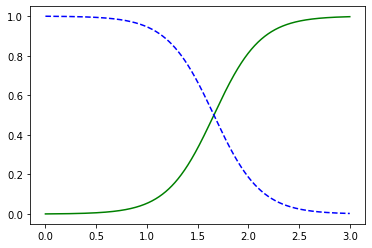

In [12]:
plt.plot(X_new, y_proba[:, 1], "g-", label = "virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not virginica")
plt.show()

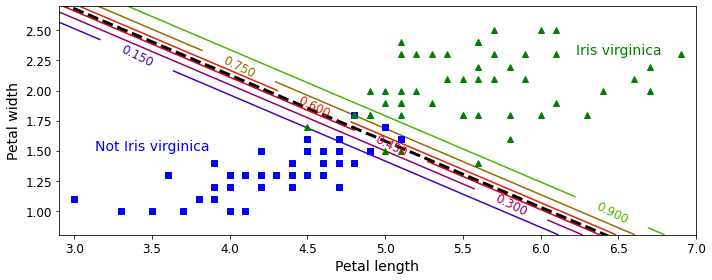

### 여러 클래스에 대한 모형

반응변수가 여러 클래스를 가질 때에도 확장 가능하다.

$$ \mathbb P (Y = k | X) = \frac{e^{\theta^{(k)}_0 + \theta^{(k)}_1 X_1 + \cdots + \theta^{(k)}_p X_p}}{\sum_{\ell=1}^{K}e^{\theta^{(\ell)}_0 + \theta^{(\ell)}_1 X_1 + \cdots + \theta^{(\ell)}_p X_p}} $$

(각 클래스에 대한 총 $K$개의 식이 생성되지만, 실제로는 이 중 $K-1$개의 식이면 충분하다.)

모수들은 각 클래스 $k$에 대해 $\theta^{(k)}_0, \theta^{(k)}_1, \cdots, \theta^{(k)}_p$의 총 $1+p$개가 존재한다.

이를 multinomial regression 혹은 softmax regression이라고 부르기도 한다.

(여러 클래스를 가지는 경우 다음에 살펴볼 discriminant analysis를 사용하는 방법도 있다.)

#### gradient for softmax

소프트맥스 회귀의 경우도 그레디언트 벡터를 구할 수 있다.

$K$개의 클래스가 있다고 하자. 다시 말해, $ y_i \in \{ 1, \cdots, K \}$.

편의를 위해 $p_{i}^{(k)}$를 다음으로 정의하자.

$$ p_{i}^{(k)} =  P(y_i = k | x_i, \Theta ) = \frac{\exp(\theta^{(k)} \cdot x_i)}{\sum_{\ell=1}^{K} \exp(\theta^{(\ell)} \cdot x_i)} $$

여기서

$$\Theta = \begin{bmatrix} \theta^{(1)} & \theta^{(2)} & \cdots & \theta^{(K)} \end{bmatrix}$$

이고,

$$ \theta^{(k)} = \begin{bmatrix} \theta^{(k)}_0 & \theta^{(k)}_1 & \cdots & \theta^{(k)}_p \end{bmatrix}^{\top} $$

이다.


비용 함수에 대한 cross entropy는 

$$ J(\Theta) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} y_i^{(\ell)} \log p_{i}^{(\ell)} $$

이며, 여기서

$$ y_i^{(\ell)} = \mathbb {I}_{\{ y_i=\ell \}}. $$


$J$의 $\theta^{(k)}$에 대한 그레디언트 벡터는 

$$ \nabla_{\theta^{(k)}} J (\Theta) = \begin{bmatrix} \frac{\partial J(\Theta)}{\partial \theta_0^{(k)}} \\ \frac{\partial J(\Theta)}{\partial \theta_1^{(k)}} \\ \vdots \\ \frac{\partial J(\Theta)}{\partial \theta_p^{(k)}}  \end{bmatrix} = \frac{1}{N} \sum_{i=1}^{N} ( p_i^{(k)} - y_i^{(k)} ) x_i .$$

위 식을 유도하기 위해

\begin{align*}
\frac{\partial J(\Theta)}{\partial \theta_j^{(k)}}  &= -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} \frac{\partial}{\partial \theta_j^{(k)}}  y_i^{(\ell)} \log p_{(i)}^{(\ell)} \\
&= -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} y_i^{(\ell)} \frac{\partial \log p^{(\ell)}_i }{\partial p^{(\ell)}_i}  \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}} \frac{\partial a^{(k)}}{\partial \theta_{j}^{(k)}}
\end{align*}

여기서

$$ a^{(k)} = \theta^{(k)} \cdot x_i $$ 

이고

$$ \frac{{\partial a^{(k)}}}{\partial \theta_{j}^{(k)}} = x_{ij}. $$

따라서

$$\frac{\partial J(\Theta)}{\partial \theta_j^{(k)}} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{\ell = 1}^{K} \frac{y^{(\ell)}_i}{p^{(\ell)}_i}  \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}}  x_{ij}.$$

또한, 만약 $\ell = k$ 이면,
$$ \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}} = \frac{\partial p^{(\ell)}_i}{\partial a^{(\ell)}} = \frac{\partial}{\partial a^{(\ell)}} \frac{\exp(a^{(\ell)})}{\sum_{m=1}^{K} \exp(a^{(m)})} = \frac{\exp(a^{(\ell)})\sum_{m=1}^{K} \exp(a^{(m)}) -  \exp(a^{(\ell)}) \exp(a^{(\ell)})}{ (\sum_{m=1}^{K} \exp(a^{(m)}) )^2 } = p^{(\ell)}_i \left( 1 - p^{(\ell)}_i \right) $$
이고, 만약 $\ell \neq k$ 이면
$$ \frac{\partial p^{(\ell)}_i}{\partial a^{(k)}} =  - \frac{ \exp(a^{(\ell)}) \exp(a^{(k)})}{ (\sum_{m=1}^{K} \exp(a^{(m)}) )^2 } = -  p^{(k)}_i p^{(\ell)}_i$$
이다.

그러므로,
\begin{align*}
\frac{\partial J(\Theta)}{\partial \theta_j^{(k)}} &= -\frac{1}{N} \sum_{i=1}^{N} \left( y_i^{(k)} (1 - p_i^{(k)} )  - \sum_{\ell \neq k} p_i^{(k)} y_i^{(\ell)} \right) x_{ij} \\
&=  -\frac{1}{N} \sum_{i=1}^{N} \left(y_i^{(k)} - p_i^{(k)} \left(y_i^{(k)}  + \sum_{\ell \neq k} y_i^{(\ell)}\right) \right) x_{ij}  \\
& = \frac{1}{N} \sum_{i=1}^N (p_i^{(k)} - y_i^{(k)} ) x_{ij}.
\end{align*}
이다.

위 식에서 $p_i^{(k)}$가 $\theta^{(k)}$에 대한 함수이며, $x_{ij}$와 $y_i^{(k)}$는 관찰값들이다.

다른 클래스들에 대하여도 위와 같은 그레디언트 벡터가 필요하다.

In [13]:
import numpy as np

In [14]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs")
softmax_reg.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [17]:
softmax_reg.predict([[2, 2]]) # petal length 5, petal width 2

array([0])

In [18]:
softmax_reg.predict_proba([[4, 2]])

array([[0.01485895, 0.77182184, 0.2133192 ]])

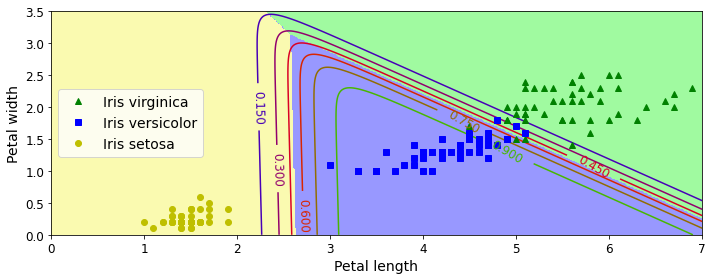

### Linear discriminant analysis

이전의 방법은 $\mathbb P (Y=k | X=x)$의 확률을 계산하는 것이었다.

Linear distcriminat analysis에서는 주어진 $Y$에 대해 $X$의 분포를 추정한다.

만약 $X$의 분포가 정규분포라고 하면, 이 방법은 logistic regression과 매우 흡사하다.

다음의 상황에서 linear discriminant analysis가 유용하게 사용될 수 있다.

* 클래스들이 잘 분리되어 있을 때, logistic regression의 모수 추정은 불안정한 경우가 많다. 이 경우 LDA가 더 좋다.

* 데이터의 개수가 상대적으로 작고, $X$의 분포가 정규분포와 흡사할 때, LDA가 logistic regression 보다 잘 작동하는 경우가 많다.

* 2개 이상의 클래스가 있을 때, LDA는 유용하게 사용될 수 있다.

LDA는 Bayes 정리를 기반으로 한다.

$Y$가 $K$개의 클래스를 가질 수 있다고 하자.

$\pi_k$를 임의로 선택한 관찰 결과가 $k$에 속하게 될, 사전 확률 (prior probability)이라고 하자.

* 즉, 이 확률은 $X$에 대한 정보 없이 결정된 확률이다.

$Y$가 $k$의 클래스에 속할 때, $X$의 확률밀도함수를 다음과 같이 정의하자.

$$ f_k(X) = \mathbb P (X=x | Y=k) $$

Bayes 정리에 따르면,

$$ \mathbb P(Y = k | X = x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K} \pi_l f_l(x)} $$

한편, $p_k(x) = \mathbb P(Y = k | X = x)$라고 하겠다. 이를 사후 확률, posterior probability 라고도 한다.

이전에는 $p_k$를 직접 계산하는 것이 목표였다면, LDA에서는 $\pi$들과 $f$들을 추정하여, $p_k$를 추정한다.

* $\pi_k$는 추정이 쉽다.

* 반면, $f_k$의 추정은 더 어려운 문제이다.



### Linear Discriminant Analysis when p = 1

$Y$가 $k$의 클래스에 속할 때, $X$의 확률밀도함수 $f_k$를 정규분포로 가정해 보자.

$$ f_k(x) = \frac{1}{\sqrt{2 \pi} \sigma_k} e^{ -\frac{1}{2} \left( \frac{x - \mu_k}{\sigma_k} \right)^2 } $$

여기서 $\mu_k$는 평균, $\sigma_k^2$은 분산이다.

편의를 위해 $\sigma_k = \sigma$로 가정하겠다.

Bayes 정리 식에 따르면 $p_k(x) = \mathbb P (Y = k | X = x)$에 대한 다음의 다소 복잡한 식을 얻는다.

$$ p_k (x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left( \frac{x - \mu_k}{\sigma} \right)^2}}{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left( \frac{x - \mu_l}{\sigma} \right)^2}} $$

$X=x$에서의 분류를 위하여 어떤 $p_k (x)$가 가장 큰지 알아봐야 한다.

위 식에 로그를 취하고, 불필요한 항을 제거하면, discriminant score라 불리우는 다음의 값을 얻는다.

$$ \delta_k (x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + \log (\pi_k) $$

$p_k$ 중 어느 것이 가장 큰지를 찾는 것과 $\delta_k$ 중 어느 것이 가장 큰지 찾는 문제는 동치이다.

$\delta_k$는 $x$의 선형 함수임을 주목하라.

예들들어 만약 $K=2$이고, $\pi_1 = \pi_2 = 0.5$이면 결정 경계는 다음과 같다.

$$ x = \frac{\mu_1 + \mu_2}{2} $$

실제로는 모수의 값들을 알지 못하기 때문에 다음으로 추정하여 사용한다.

\begin{align*}
\hat \pi_k &= \frac{n_k}{n} \\
\hat \mu_k &= \frac{1}{n_k} \sum_{i:y_i=k} x_i \\
\hat \sigma^2 &= \frac{1}{n-K} \sum_{k=1}^{K} \sum_{i:y_i=k}(x_i - \hat \mu_k)^2
\end{align*}


### Linear Discriminant Analysis when p > 1

다변량 정규분포를 이용하여 $p>1$인 경우로 확장가능하다.

다변량 정규분포의 확률밀도함수는 다음으로 정의된다.

$$ f(X) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} \exp \left(-\frac{1}{2} (x - \mu)^{\top} \Sigma^{-1} (x - \mu) \right) $$

여기서 $\mu$는 평균으로 이루어진 벡터, $\Sigma$는 공분산 행렬, $|\Sigma|$는 행렬식 (determinant)을 의미한다. 

LDA에서는 $k$번째 클래스에 대응되는 $X$의 분포가 $N(\mu_k, \Sigma)$를 따른다고 가정한다. $X$의 크기에 따라 $\mu_k$ 또한 벡터로 표현됨을 주목하라.

이를 이용하여 discriminant score를 계산하면,

$$ \delta_k (x) = x^{\top} \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^{\top} \Sigma^{-1} \mu_k + \log \pi_k $$

이며, 따라서, $X=x$의 관찰값에 대해 $\delta_k$의 값이 가장 큰 클래스를 선정한다.

비록 $\delta_k$는 복잡해 보여도 $x$들에 대한 선형함수이다.

아래는 $\pi_1 = \pi_2 = \pi_3 = 1/3$에 대한 LDA 경계선의 예제이다.

점선은 Bayes decision boundary 이고, 실선이 정규분포를 바탕으로 한 LDA boundary이다. 

<img src="image/LDA3.png" width="700">

데이터로부터 $\hat \delta_k (x)$가 추정되면, 이 추정치를 각 클래스에 대한 확률 추정에 사용할 수 있다.

$$ \hat{\mathbb P} (Y=k | X=x) = \frac{e^{\hat \delta_k (x)}}{\sum_{l = 1}^{K} e^{\hat \delta_{l}(x)}} $$

In [19]:
from sklearn import datasets
import pandas as pd
raw_wine = datasets.load_wine()

In [20]:
raw_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [21]:
raw_wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [22]:
pd.DataFrame(raw_wine["data"], columns = raw_wine["feature_names"])

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [23]:
X, y  = raw_wine.data[:,:2], raw_wine.target

In [24]:
# 트레이닝 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

In [25]:
# 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_tn_std = std_scale.fit(X).transform(X_tn)
X_te_std = std_scale.fit(X).transform(X_te)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_tn, y_tn)

LinearDiscriminantAnalysis()

In [28]:
xx1, xx2 = np.meshgrid(np.linspace(11, 15, 1000),
                         np.linspace(0, 6, 1000))

In [29]:
import numpy as np
from matplotlib import colors

xx1, xx2 = np.meshgrid(np.linspace(11, 15, 1000),
                         np.linspace(0, 6, 1000))


Z = lda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z

array([[7.69457463e-05, 9.99809843e-01, 1.13211495e-04],
       [7.83921354e-05, 9.99807085e-01, 1.14522994e-04],
       [7.98657096e-05, 9.99804285e-01, 1.15849680e-04],
       ...,
       [1.44024013e-01, 2.04954165e-05, 8.55955492e-01],
       [1.44902190e-01, 2.02398699e-05, 8.55077570e-01],
       [1.45784811e-01, 1.99873845e-05, 8.54195202e-01]])

In [30]:
clss = np.argmax(Z, axis=1).reshape(xx1.shape)
clss

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=int64)

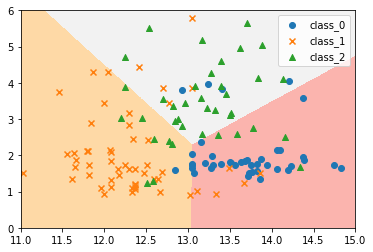

In [31]:
plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i)
    plt.legend()
    
plt.show()

### Confusion matrix


|            |          | True  status   |                |
|------------|----------|----------------|----------------|
|            |          | Positive       | Negative       |
| Prediction | Positive | True Positive  | False Positive |
|            | Negative | False Negative | True Negative  |
|            |          |                |                |


Types of errors

* False positive rate : 실제 negative 중 positive로 잘못 예상된 False positive에 해당하는 비율   
* False negative rate : 실제 positive 중 negative로 잘못 예상된 False negative에 해당하는 비율

그 외의 용어들:

* 민감도, 재현율, Sensitivity, Recall (True positive rate) : 실제 positive 중 True positive에 해당하는 비율, 실제 postive 중 올바르게 positive로 예측된 비율
  * 1 - FNR
* 특이도, Specificity (True negative rate) : 실제 negative 중 True negative에 해당하는 비율, 실제 negative 중 올바르게 negative로 예측된 비율
  * 1 - FPR
* 정밀도, Precision (Positive predictive rate) : 양성 예측 중 실제 양성의 비율
* Negative predictive rate : 음성 예축 중 실제 음성의 비율
* 정확도, Accuracy : 전체 데이터 중 정답으로 분류되는 비율
* 에러율, Error rate : 전체 데이터 중 오답으로 분류되는 비율

정밀도와 재현율은 트레이드오프를 지닌다. 

정밀도를 올리면 재현율 (민감도)이 줄고, 재현율을 높이면 정밀도가 낮아지는 경향이 있다.

양성으로 판정되는 기준을 높이면 정밀도가 올라가나, 민감도 (재현율)은 떨어진다.

양성으로 판정되는 기준을 낮추면 재현율은 올라가나, 정밀도는 떨어진다.


<img src="image/trade_off.png" width="600">

### ROC (receiver operating characteristic) curve

x-축에 FPR (False positive rate)을 놓고, y-축에 민감도 (재현율)의 값을 놓고 비교하는 것

모형마다 ROC가 다르며, ROC 아래의 면적 (AUC)이 클 수록 좋은 분류기라고 할 수 있다.

<img src="image/roc.png" width="400">

한편, 위 ROC 곡선에서 FPR은 낮으면서, 재현율은 높은 지점에 해당하는 적절한 모형을 선택하는 것이 중요할 것이다.

In [32]:
pred_by_LDA = lda.predict(X_te)
print(pred_by_LDA)

[2 1 2 1 0 2 1 0 2 1 0 2 1 0 1 1 0 0 1 0 0 1 1 1 0 2 0 0 0 2 1 0 1 0 1 1 1
 1 1 0 0 1 2 2 0]


In [33]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_by_LDA)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.89      1.00      0.94        17
           2       0.67      0.60      0.63        10

    accuracy                           0.84        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.84      0.84      0.84        45



### 다른 형태의 discriminant analysis

* $f_k(x)$가 Gaussian이며 $\Sigma_{k}$가 각 클래스 별로 다를 경우, quadratic discriminant analysis라고 한다.

* $f_k(x) = \prod_{j=1}^{p} f_{jk}(x_j)$, 즉, $x$들이 조건부 독립일 때, 이를 naive Bayes라고 한다.

* 그 외에, $f_k$를 어떻게 정의하느냐에 따라 다양한 discriminant analysis form이 존재할 수 있다.

### Quadratic discriminant analysis

$$ \delta_k(x) = -\frac{1}{2} (x - \mu_k)^{\top} \Sigma_{k}^{-1} (x - \mu_k) + \log \pi_k $$

$k$에 따라 $\Sigma_{k}$가 다르기 때문에, quadratic 형태의 라인이 경계선으로 나타난다.

<img src="image/QDA.png" width="700">

### Naive Bayes

$x$들이 모두 독립이라고 가정한 경우를 Naive Bayes라고 부른다.

$p$가 클 경우 유용하다.

Gaussian naive Bayes에서는 $\Sigma_k$가 대각 행렬이 된다. 따라서

$$ \delta_k(x) \propto \log \left[ \pi_k \prod_{j=1}^{p} f_{kj}(x_j) \right] = -\frac{1}{2} \sum_{j=1}^{p} \frac{(x_j - \mu_{kj})^2}{\sigma_{kj}^2} + \log \pi_k $$

이 방법은 $x$가 질적 변수, 양적 변수가 섞여 있을 때에도 적용할 수 있다.

만약 $X_j$가 질적 변수라면, $f_{kj}(x_j)$ 대신 prabability mass function을 적용한다.

Naive Bayes는 강한 조건을 가정하지만, 비교적 좋은 분류 결과를 얻는 경향이 있다고 한다.

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_tn, y_tn)

GaussianNB()

In [35]:
pred_by_gnb = gnb.predict(X_te)
print(pred_by_gnb)

[2 1 2 1 0 2 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 2 0 0 0 2 1 0 1 0 1 1 1
 1 1 0 0 1 2 2 0]


In [36]:
class_report_gnb = classification_report(y_te, pred_by_gnb)
print(class_report_gnb)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.85      1.00      0.92        17
           2       0.71      0.50      0.59        10

    accuracy                           0.84        45
   macro avg       0.82      0.80      0.80        45
weighted avg       0.84      0.84      0.83        45

